# Анализ и визуализация данных

## Лабораторная 4. Обработка пропущенных значений и визуализация количественных данных

Файл `c.xlsx` содержит данные о рейтингах видео-игр по данным Metacritic. Набор данных содержит следующие переменные:

* `Name` – название игры.
* `Platform` – платформа для запуска игры.
* `Year_of_Release` – год запуска игры.
* `Genre` – жанр игры.
* `Publisher` – компания, выпустившая игру.
* `NA_Sales` – продажи в Северной Америке (миллионы копий).
* `EU_Sales` – продажи в Европейском Союзе (миллионы копий).
* `JP_Sales` – продажи в Японии (миллионы копий).
* `Other_Sales` – продажи в прочих странах (миллионы копий).
* `Global_Sales` – общие продажи по миру (миллионы копий).
* `Critic_Score` – агрегированный рейтинг команды Metacritic.
* `Critic_Count` – количество экспертов, участвовавших в расчёте `Critic_Score`.
* `User_Score` – агрегированный рейтинг пользователей Metacritic.
* `User_Count` – количество пользователей, участвовавших в расчёте `User_Score`.
* `Developer` – разработчик игры.
* `Rating` – рейтинг ESRB (Everyone, Teen, Adults Only, ...).

Импортируем библиотеку `pandas` с сокращённым названием:

In [1]:
import pandas as pd

Загрузим данные из файла:

In [2]:
games = pd.read_excel("c.xlsx")

Вспомним, как выглядит датафрейм:

In [3]:
games.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.describe()

,Unnamed: 0,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,8359.000000,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,4826.503911,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,0.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4179.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8359.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,12538.500000,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,16718.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### Задача 1

Определите количество пропущенных значений признака, содержащих информацию о названиях разработчиков игр (переменная `Developer`). Выпишите найденное количество пропущенных значений.

Пример ответа: 100.00

In [5]:
miss_dev = games['Developer'].isna().sum()
print(f'Ответ: {miss_dev} записей')

Ответ: 6623 записей


### Задача 2

Определите количество пропущенных значений признака, содержащих информацию о названиях разработчиков игр (переменная `Developer`). Замените пропущенные значения этого признака на моду по этому признаку и сохраните полученный признак без пропущенных значений в отдельную переменную, не включаемую в исходную таблицу. Выпишите количество значений этой переменной, равной ее моде.

Пример ответа: 100

In [13]:
missing_developer_count = games['Developer'].isna().sum()
print(f"Количество пропущенных значений в Developer: {missing_developer_count}")

developer_mode = games['Developer'].mode()[0]

developer_filled = games['Developer'].fillna(developer_mode)

mode_count = (developer_filled == developer_mode).sum()
print(f"Количество значений признака Developer, равных моде: {mode_count}")

Количество пропущенных значений в Developer: 6623
Количество значений признака Developer, равных моде: 6827


### Задача 3

Постройте ящик с усами для агрегированного рейтинга команды Metacritic. Прокомментируйте полученное распределение. 

<Axes: >

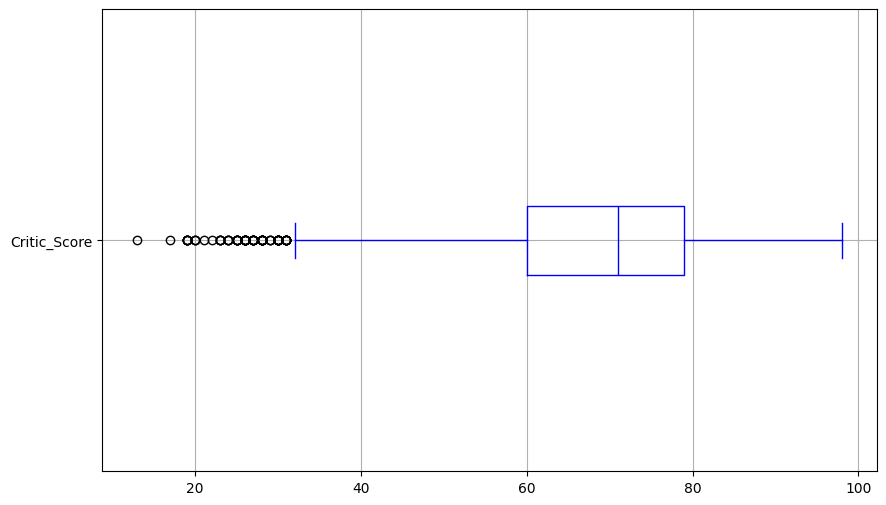

In [20]:
games['Critic_Score'].dropna().plot.box(
    vert=False,  # Горизонтальная ориентация
    figsize=(10, 6),  # Размер графика
    grid=True,  # Отображение сетки
    color="blue"  # Цвет коробки
)

# * Ящик с усами (boxplot) дает наглядное представление 
#     о распределении оценок игр. Медиана (`50%` квантиль) находится 
#     в центре ящика, что говорит о сбалансированности оценок.
# * Размах данных (длина усов) свидетельствует о том, что большинство 
#     оценок сосредоточено в относительно узком диапазоне.
# * Точки за пределами усов — это выбросы, отражающие игры с необычно 
#     низкими или высокими оценками.


### Задача 4

Постройте гистограмму для агрегированного рейтинга команды Metacritic. Усовершенствуйте полученную гистограмму: 

* настройте цвет;
* добавьте подписи к осям;

Сделайте картинку размера 16 на 9 дюймов с разрешением 300 точек на дюйм и выгрузите в png-файл.

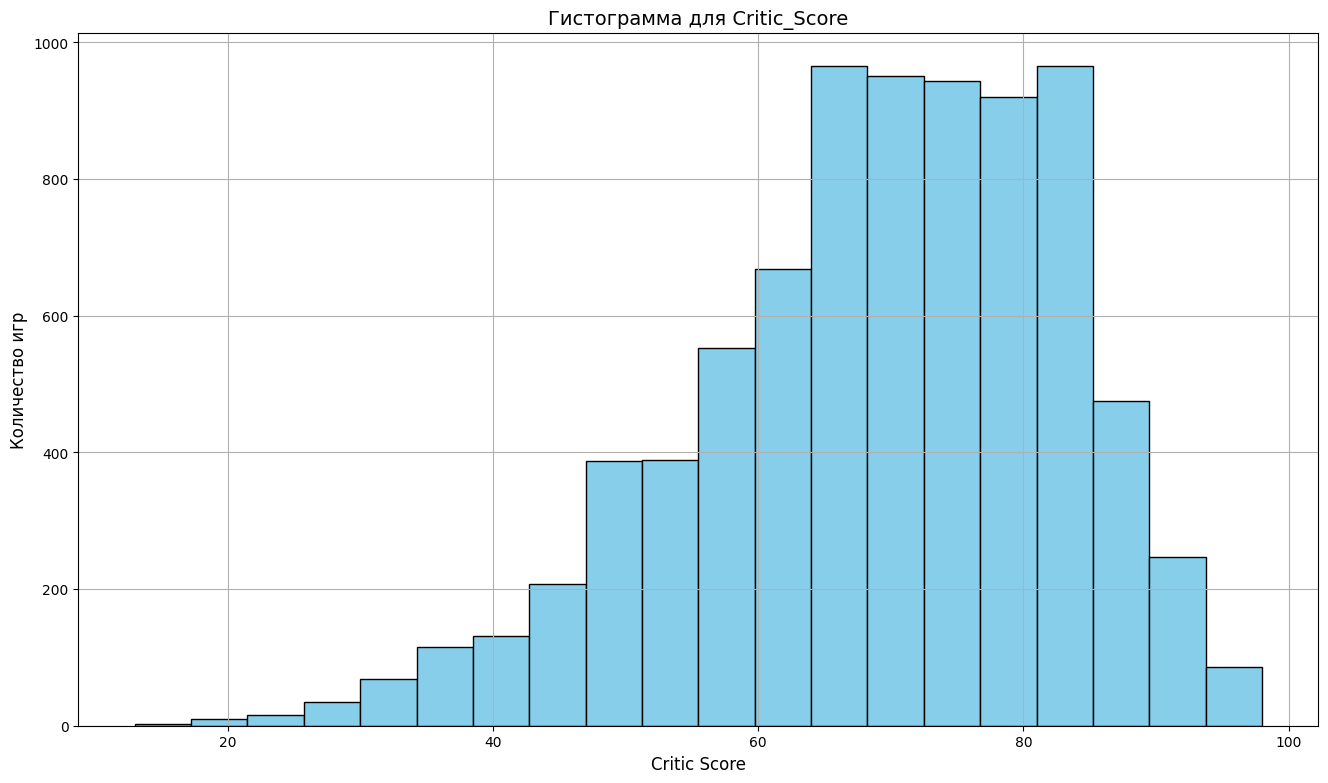

In [21]:
ax = games['Critic_Score'].plot.hist(
    bins=20,
    color='skyblue',
    edgecolor='black',
    figsize=(16, 9),
    grid=True,
)

ax.set_title('Гистограмма для Critic_Score', fontsize=14)
ax.set_xlabel('Critic Score', fontsize=12)
ax.set_ylabel('Количество игр', fontsize=12)

fig = ax.get_figure()
fig.savefig('critic_score_histogram_pandas.png', dpi=300)